# Tarea Final Modulo 4 Creacion de Modelo de Regresion y Deploy en Streamlit

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import pickle

In [41]:
df = pd.read_csv('C:/Users/fresh/OneDrive/Escritorio/salary_prediction_data.csv')
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


<function matplotlib.pyplot.show(close=None, block=None)>

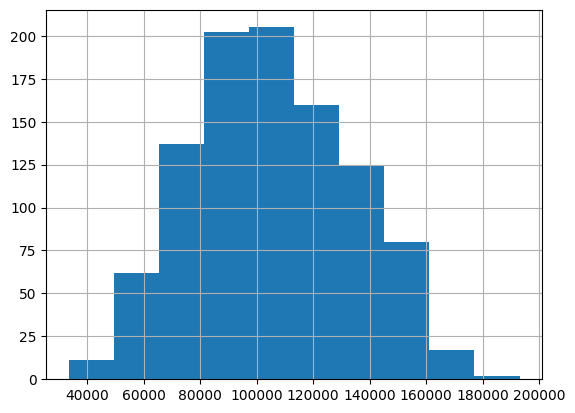

In [42]:
# Validamos que los datos dentro del modelo sean correctos y tengan una distribucion normal. La mayoria de los salarios se encuentran entre los 
#90K y 110K
df['Salary'].hist()
plt.show

In [43]:
# Podemos validar que dentro de la base de datos no se puede asegurar que quienes tengan salarios mas elevados sean quienes mas estudios tengan ya que existe una igualdad en 
# la cantidad de datos que tienen cada una de las categorias
df['Education'].value_counts()

Education
High School    255
Bachelor       253
PhD            251
Master         241
Name: count, dtype: int64

In [44]:
df['Job_Title'].value_counts()

Job_Title
Director    275
Analyst     255
Manager     241
Engineer    229
Name: count, dtype: int64

In [45]:
# Procedemos a convertir las variables Educacion y Posicion en Variables dummies con las que podamos crear un grafico de correlacion
df2 = df.join(pd.get_dummies(df[['Job_Title', 'Education','Location','Gender']])).drop(['Job_Title', 'Education','Location','Gender'], axis=1)
df2

,Experience,Age,Salary,Job_Title_Analyst,Job_Title_Director,Job_Title_Engineer,Job_Title_Manager,Education_Bachelor,Education_High School,Education_Master,Education_PhD,Location_Rural,Location_Suburban,Location_Urban,Gender_Female,Gender_Male
0,8,63,84620.053665,False,False,False,True,False,True,False,False,False,False,True,False,True
1,11,59,142591.255894,False,True,False,False,False,False,False,True,False,True,False,False,True
2,28,61,97800.255404,False,False,False,True,True,False,False,False,False,True,False,True,False
3,29,45,96834.671282,False,True,False,False,False,True,False,False,True,False,False,False,True
4,25,26,132157.786175,True,False,False,False,False,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8,25,64683.389864,True,False,False,False,False,True,False,False,False,True,False,True,False
996,24,30,74468.205020,False,False,True,False,False,True,False,False,False,False,True,True,False
997,18,44,98207.026024,True,False,False,False,False,False,True,False,True,False,False,False,True
998,27,31,108544.922720,False,True,False,False,True,False,False,False,False,True,False,True,False


<Axes: >

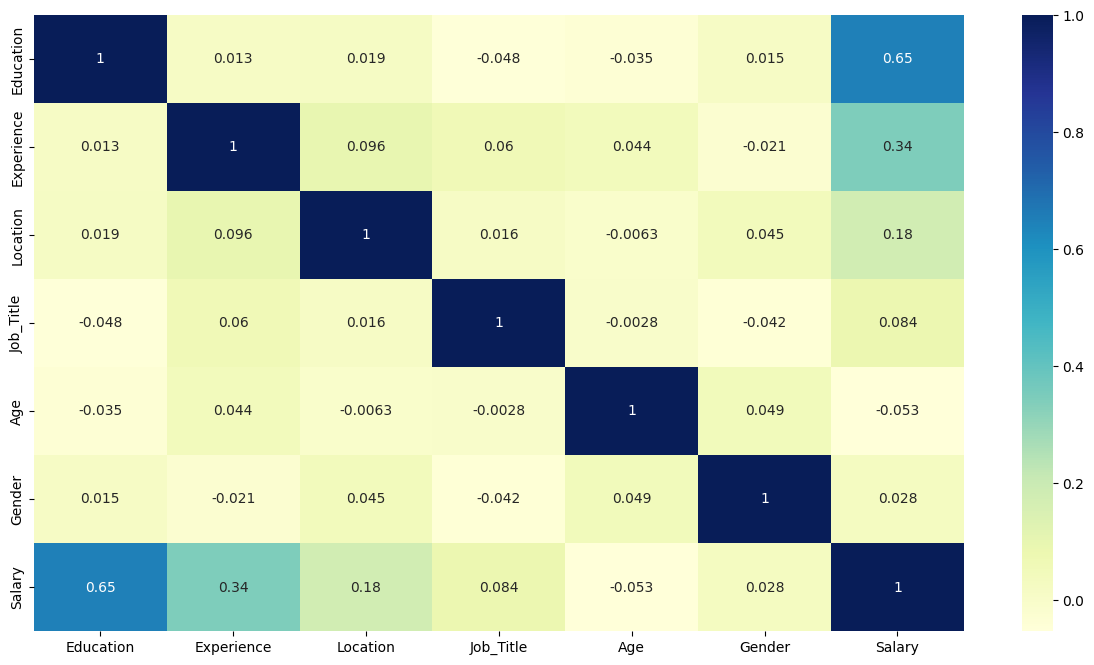

In [39]:
#Contrario a lo que manejabamos anteriormente podemos ver que dos variables que afectan el salario es la experiencia y el tener un nivel educativo alto como un doctorado eleva exponencialmente el salario al que se puede aspirar segun el codigo
#La zona tambien suele tener relacion es decir las zonas urbanas tienen una mayor correlacion con los sueldos altos esto puede deberse a que suelen requerir un mayor nivel de especializacion
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

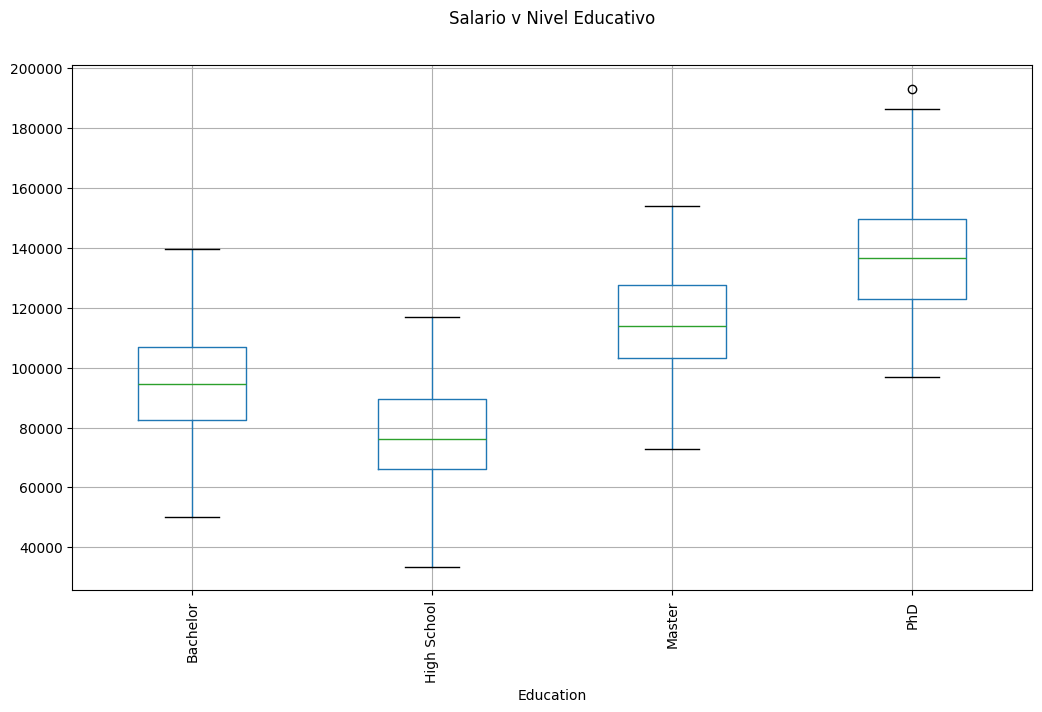

In [46]:
#Por la elevada correlacion con tener un doctorado considero prudente introducir un grafico para ver que tan dispares son estos salarios a los de los demas niveles de estudio
#Podemos ver que la media de sueldos se va a elevando conforme al nivel de estudios que tienen las personas
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Education', ax=ax )
plt.suptitle('Salario v Nivel Educativo')
plt.title('')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show()

In [47]:
le = LabelEncoder()
#['Job_Title', 'Education','Location','Gender'], axis=1)
df['Job_Title'] = le.fit_transform(df['Job_Title'])
df['Education'] = le.fit_transform(df['Education'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Location'] = le.fit_transform(df['Location'])

df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,1,8,2,3,63,1,84620.053665
1,3,11,1,1,59,1,142591.255894
2,0,28,1,3,61,0,97800.255404
3,1,29,0,1,45,1,96834.671282
4,3,25,2,0,26,0,132157.786175


In [48]:
df.describe()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.490000,14.771000,0.965000,1.456000,42.377000,0.516000,105558.404239
std,1.122123,8.341111,0.808968,1.114139,13.609412,0.499994,28256.972075
min,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,33510.510669
25%,0.000000,7.000000,0.000000,0.000000,30.000000,0.000000,85032.141517
50%,1.000000,15.000000,1.000000,1.000000,43.000000,1.000000,104314.518315
75%,3.000000,22.000000,2.000000,2.000000,55.000000,1.000000,126804.047524
max,3.000000,29.000000,2.000000,3.000000,64.000000,1.000000,193016.602150


In [54]:
# Procedemos a iniciar el entrenamiento del modelo y a dividir las variables
X = df.drop('Salary', axis = 1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
LinearReg = LinearRegression()
LinearReg.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = LinearReg.predict(X_test)

In [57]:
# Obtenemos el error y vemos que se esta prediciendo con una desviacion de cerca de 10,000 dolares
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$18,813.89


C:\Users\fresh\AppData\Local\Temp\ipykernel_12368\1877447531.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(disterror)


<Axes: xlabel='Salary', ylabel='Density'>

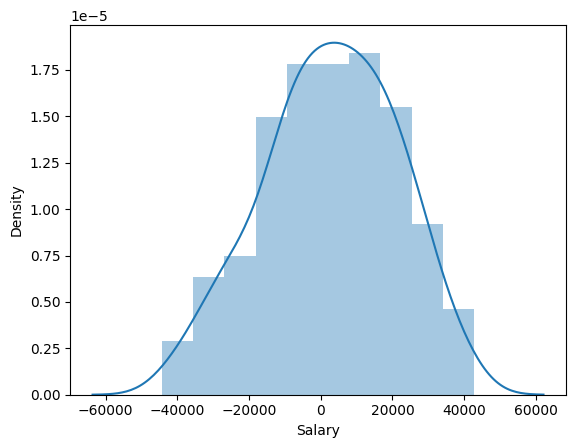

In [58]:
#Graficamos la distancia del error que presenta el modelo
disterror = y_test - y_pred
sns.distplot(disterror)

In [62]:
with open('LinearReg', 'wb') as archivo:
    pickle.dump(LinearReg, archivo)

In [69]:
df['Age'].unique()

array([63, 59, 61, 45, 26, 27, 60, 49, 25, 58, 23, 43, 44, 37, 53, 34, 62,
       36, 21, 20, 35, 28, 40, 22, 50, 33, 31, 47, 64, 24, 57, 32, 48, 46,
       42, 51, 41, 56, 54, 30, 38, 29, 52, 39, 55], dtype=int64)